## Import Data and Library

### Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from zipfile import ZipFile

### Import Data

In [2]:
with ZipFile('big-startup-secsees-fail-dataset-from-crunchbase.zip') as raw_zip:
    raw_zip.extractall(path='datasets')
    
    raw_data = pd.read_csv('datasets/big_startup_secsees_dataset.csv')

In [3]:
raw_data.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


## Data Inspection

### Total Amount of Rows and Columns

In [4]:
raw_data.shape

(66368, 14)

### Data Fields

In [5]:
raw_data.columns

Index(['permalink', 'name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at'],
      dtype='object')

#### Data Fields Information
1. permalink: Link to Organization
2. name: Company Name
3. homepage_url: Startup Site
4. category_list: Field of company
5. funding_total_usd: Total Funding in USD
6. status: Operating Status
7. country_code: Country Code
8. state_code: State Code of company location
9. region: Region of company location
10. city: Cit of company location
11. funding_rounds: the number of times a startup opts to raise capital from the market.
12. founded_at: the date when the startup is founded
13. first_funding_at: the date when the startup get first funding
14. last_funding_at: the date when the startup get last funding

### Visualize the Target Data (Status)

<Axes: >

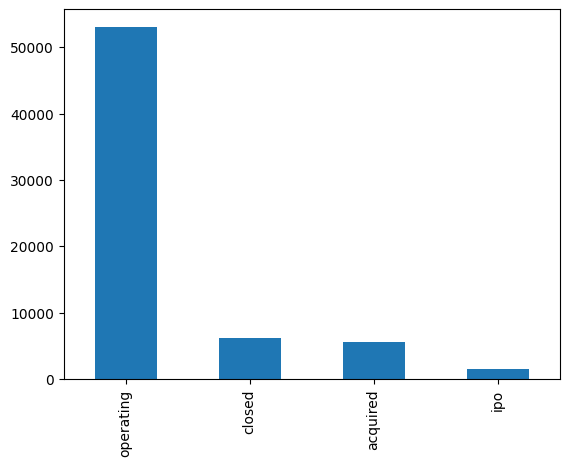

In [6]:
raw_data['status'].value_counts().plot(kind='bar')

Our objective is to find whether the startup will fail (closed) or success (acquier/ipo), so we dont need operating status. We will drop these rows.

In [7]:
success_startup = np.logical_or(raw_data['status'] == 'ipo', raw_data['status'] == 'acquired')
fail_startup = raw_data['status'] == 'closed'

raw_data['status'][fail_startup] = 'fail'
raw_data['status'][success_startup] = 'success'

/tmp/ipykernel_32592/516772136.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['status'][fail_startup] = 'fail'
/tmp/ipykernel_32592/516772136.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['status'][success_startup] = 'success'


In [8]:
valid_index = (~(raw_data['status'] == 'operating'))

raw_data = raw_data[valid_index]

raw_data

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
15,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,5000000,success,USA,CA,SF Bay Area,Cupertino,1,2012-03-01,2015-03-17,2015-03-17
20,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,500000,success,USA,WA,Seattle,Seattle,1,2009-01-01,2009-05-15,2009-05-15
23,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,2535000,success,USA,CA,SF Bay Area,San Francisco,2,2010-07-01,2010-01-01,2011-02-16
31,/organization/100plus,100Plus,http://www.100plus.com,Analytics,1250000,success,USA,CA,SF Bay Area,San Francisco,2,2011-09-16,2011-11-02,2011-11-30
32,/organization/1010data,1010data,http://www.1010data.com,Software,35000000,success,USA,NY,New York City,New York,1,2000-01-01,2010-03-08,2010-03-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66349,/organization/zyncro,Zyncro,http://www.zyncro.com,Cloud Computing|Enterprise 2.0|Enterprise Soft...,3805520,success,ESP,56,Barcelona,Barcelona,2,2009-09-01,2011-04-05,2012-02-03
66350,/organization/zynerba-pharmaceuticals,Zynerba Pharmaceuticals,http://zynerba.com,Pharmaceuticals,13000000,success,USA,PA,Philadelphia,Radnor,1,2014-01-01,2014-10-14,2014-10-14
66352,/organization/zynga,Zynga,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,866550786,success,USA,CA,SF Bay Area,San Francisco,9,2007-07-01,2007-01-01,2011-02-18
66358,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,15419877,fail,MYS,14,MYS - Other,Damansara New Village,4,1994-01-01,2008-01-01,2013-02-15


<Axes: >

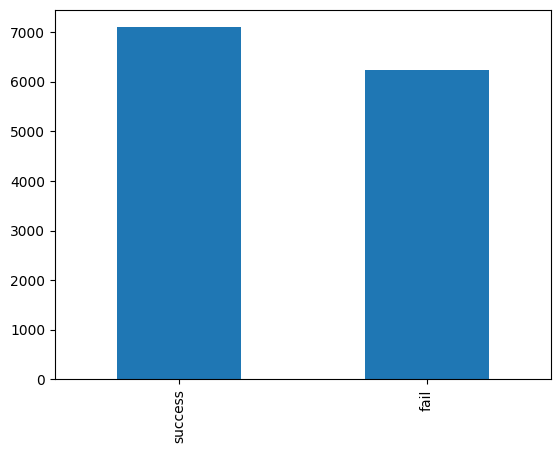

In [9]:
raw_data['status'].value_counts().plot(kind='bar')

### Check Duplicate Startup Name

In [10]:
check_name = raw_data['name'].value_counts()

check_name[check_name > 1]

SpaceConnect              2
SquareOne                 2
Stream                    2
Bloodhound                2
Stupsr                    2
Cardiovascular Systems    2
SHIFT                     2
Archive                   2
Name: name, dtype: int64

There are 8 duplicated startup name, lets check whether the startup has the same name or the data is just duplicated by checking other columns except permalink.

In [11]:
duplicate_name = check_name[check_name > 1].index

duplicate_inspect = raw_data[raw_data['name'].str.fullmatch('|'.join(duplicate_name)) == True]

duplicate_inspect

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
4120,/organization/archive,Archive,NaN,NaN,-,success,USA,CA,Anaheim,Costa Mesa,1,1980-01-01,1990-05-14,1990-05-14
4121,/organization/archive-2,Archive,http://www.archive.com,Apps|B2B|Service Providers,18000000,fail,USA,CA,Los Angeles,Culver City,1,NaN,2000-10-23,2000-10-23
7537,/organization/bloodhound,Bloodhound,http://bloodhound.com,Mobile,4770000,fail,USA,CA,SF Bay Area,San Francisco,4,2011-09-01,2011-08-24,2013-01-23
7538,/organization/bloodhound-2,Bloodhound,http://www.bloodhoundinc.com/,Application Platforms|Medical|Services,3000000,fail,USA,NC,Raleigh,Durham,1,NaN,2002-11-26,2002-11-26
9738,/organization/cardiovascular-systems,Cardiovascular Systems,http://www.csi360.com,Biotechnology|Medical Devices,15000000,success,USA,MN,Minneapolis,Saint Paul,2,1989-01-01,2010-12-13,2013-03-12
9739,/organization/cardiovascular-systems-incorporated,Cardiovascular Systems,http://www.csi360.com/,Medical Devices,11220000,success,USA,MN,MN - Other,South Saint Paul,1,NaN,2008-01-09,2008-01-09
51149,/organization/shift,SHIFT,http://www.shift.com,Advertising|Consumer Goods|Facebook Applicatio...,14000000,success,USA,CA,Los Angeles,Santa Monica,4,2010-01-01,2011-02-01,2013-12-10
51151,/organization/shift-4,SHIFT,http://www.shiftinc.jp/,NaN,-,success,NaN,NaN,NaN,NaN,1,2005-09-01,2013-06-01,2013-06-01
53581,/organization/spaceconnect,SpaceConnect,NaN,NaN,38126,fail,NaN,NaN,NaN,NaN,1,NaN,2015-04-01,2015-04-01
53582,/organization/spaceconnect-2,SpaceConnect,http://www.spaceconnect.co,Algorithms|Office Space|Professional Services,38126,fail,AUS,2,Sydney,Sydney,1,2015-03-08,2015-04-01,2015-04-01


In [12]:
column_dupe = ['homepage_url', 'category_list', 'funding_total_usd', 'city', 'founded_at',
               'first_funding_at', 'last_funding_at']

temp_dupe = duplicate_inspect.copy()

for column in column_dupe:
    unique_index = duplicate_inspect[['name', column]].drop_duplicates().index
    
    duplicate_inspect = duplicate_inspect.loc[unique_index]

In [13]:
raw_data = raw_data.drop(set(temp_dupe.index) - set(duplicate_inspect.index), errors='ignore')

raw_data

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
15,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,5000000,success,USA,CA,SF Bay Area,Cupertino,1,2012-03-01,2015-03-17,2015-03-17
20,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,500000,success,USA,WA,Seattle,Seattle,1,2009-01-01,2009-05-15,2009-05-15
23,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,2535000,success,USA,CA,SF Bay Area,San Francisco,2,2010-07-01,2010-01-01,2011-02-16
31,/organization/100plus,100Plus,http://www.100plus.com,Analytics,1250000,success,USA,CA,SF Bay Area,San Francisco,2,2011-09-16,2011-11-02,2011-11-30
32,/organization/1010data,1010data,http://www.1010data.com,Software,35000000,success,USA,NY,New York City,New York,1,2000-01-01,2010-03-08,2010-03-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66349,/organization/zyncro,Zyncro,http://www.zyncro.com,Cloud Computing|Enterprise 2.0|Enterprise Soft...,3805520,success,ESP,56,Barcelona,Barcelona,2,2009-09-01,2011-04-05,2012-02-03
66350,/organization/zynerba-pharmaceuticals,Zynerba Pharmaceuticals,http://zynerba.com,Pharmaceuticals,13000000,success,USA,PA,Philadelphia,Radnor,1,2014-01-01,2014-10-14,2014-10-14
66352,/organization/zynga,Zynga,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,866550786,success,USA,CA,SF Bay Area,San Francisco,9,2007-07-01,2007-01-01,2011-02-18
66358,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,15419877,fail,MYS,14,MYS - Other,Damansara New Village,4,1994-01-01,2008-01-01,2013-02-15


### Check Data Types

In [14]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13331 entries, 15 to 66360
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          13331 non-null  object
 1   name               13330 non-null  object
 2   homepage_url       12116 non-null  object
 3   category_list      12247 non-null  object
 4   funding_total_usd  13331 non-null  object
 5   status             13331 non-null  object
 6   country_code       11342 non-null  object
 7   state_code         11124 non-null  object
 8   region             11181 non-null  object
 9   city               11181 non-null  object
 10  funding_rounds     13331 non-null  int64 
 11  founded_at         9600 non-null   object
 12  first_funding_at   13329 non-null  object
 13  last_funding_at    13331 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.5+ MB


The funding_total_usd data type is wrong, it should be float. Lets check how many data that have '-' element.

In [15]:
(raw_data['funding_total_usd'] == '-').value_counts()

False    11141
True      2190
Name: funding_total_usd, dtype: int64

In [16]:
raw_data['funding_total_usd'] = pd.to_numeric(
    arg=raw_data['funding_total_usd'],
    errors='coerce',
    downcast='float'
)

raw_data.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
15,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,5000000.0,success,USA,CA,SF Bay Area,Cupertino,1,2012-03-01,2015-03-17,2015-03-17
20,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,500000.0,success,USA,WA,Seattle,Seattle,1,2009-01-01,2009-05-15,2009-05-15
23,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,2535000.0,success,USA,CA,SF Bay Area,San Francisco,2,2010-07-01,2010-01-01,2011-02-16
31,/organization/100plus,100Plus,http://www.100plus.com,Analytics,1250000.0,success,USA,CA,SF Bay Area,San Francisco,2,2011-09-16,2011-11-02,2011-11-30
32,/organization/1010data,1010data,http://www.1010data.com,Software,35000000.0,success,USA,NY,New York City,New York,1,2000-01-01,2010-03-08,2010-03-08


Lets check again the NaN value after the conversion.

In [17]:
raw_data['funding_total_usd'].isna().value_counts()

False    11141
True      2190
Name: funding_total_usd, dtype: int64

It same with our assumption if non-numeric data only contains '-', hence we can conclude that all non-numeric data is '-', not number with string (e.g. 10 mil usd).

## Visualize Data Distribution

### Numeric Data

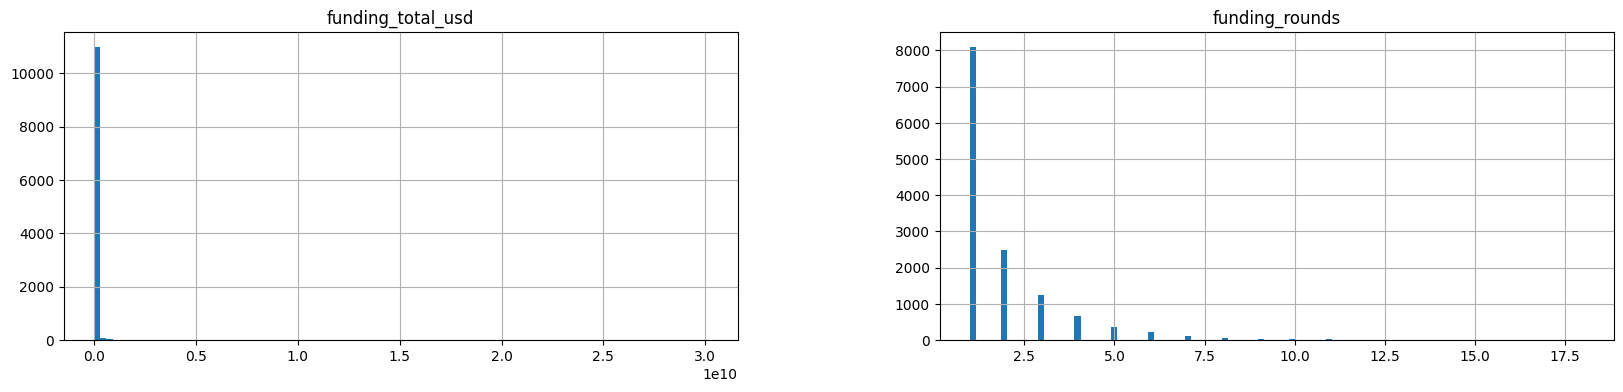

In [18]:
raw_data.hist(bins=100, figsize=(20, 4))

plt.show()

### Numeric Data Based on Success Startup

array([[<Axes: title={'center': 'funding_total_usd'}>,
        <Axes: title={'center': 'funding_rounds'}>]], dtype=object)

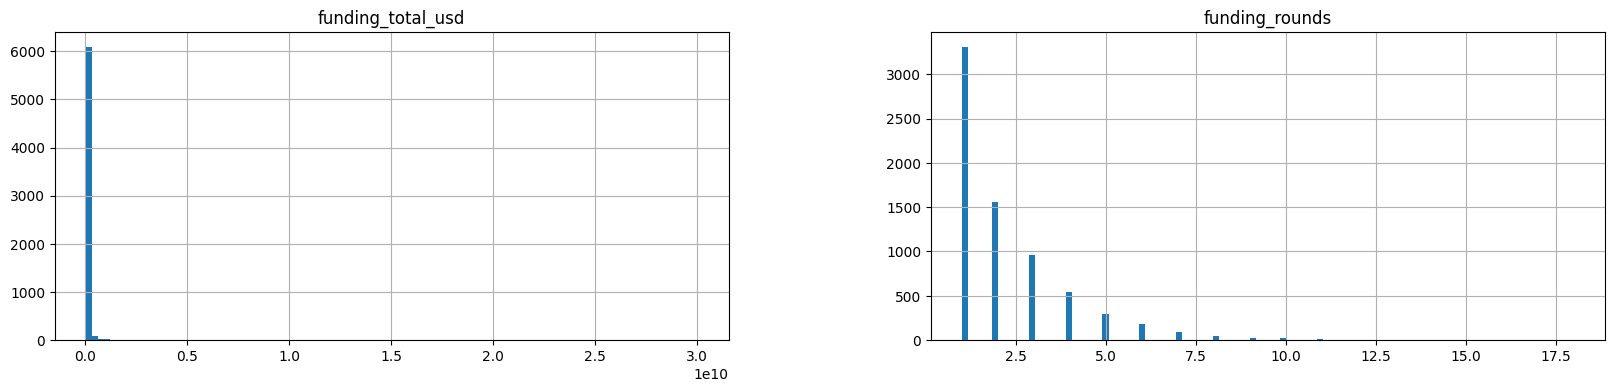

In [19]:
success_startup = raw_data[raw_data['status']=='success']

success_startup.hist(bins=100, figsize=(20, 4))

### Numeric Data Based on Fail Startup

array([[<Axes: title={'center': 'funding_total_usd'}>,
        <Axes: title={'center': 'funding_rounds'}>]], dtype=object)

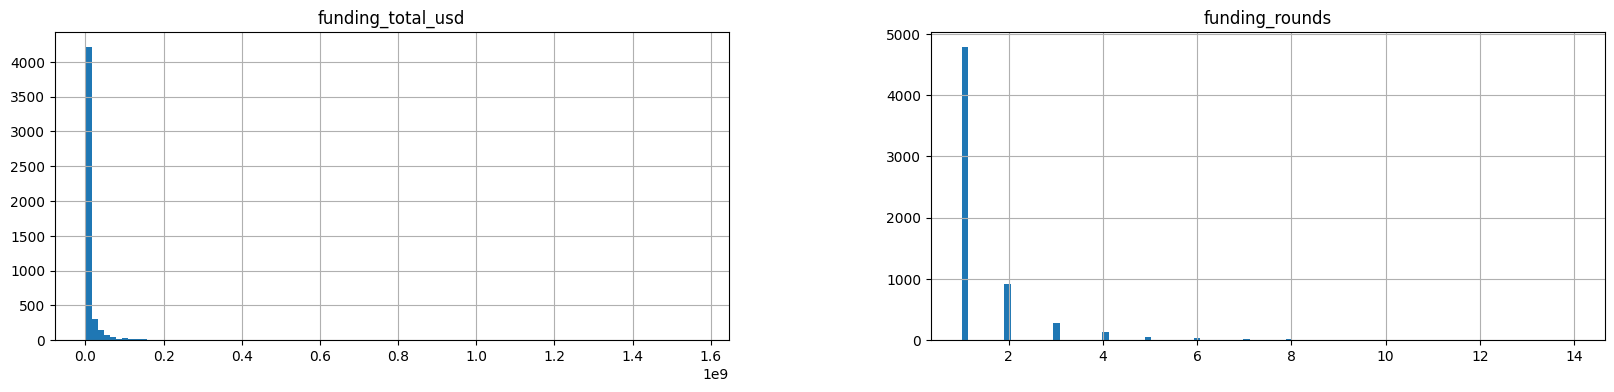

In [20]:
fail_startup = raw_data[raw_data['status']=='fail']

fail_startup.hist(bins=100, figsize=(20, 4))

The funding_total_usd column distribution is hard to see, since it has a lot of outliers. So lets inspect the funding_total_usd column.

In [21]:
raw_data['funding_total_usd'].describe()

count    1.114100e+04
mean     3.581505e+07
std      3.687884e+08
min      2.000000e+00
25%      1.000000e+06
50%      5.800000e+06
75%      2.200000e+07
max      3.007950e+10
Name: funding_total_usd, dtype: float64

The minimum value is 2 usd, which is doesn't make any sense, there is no way someone is funding a startup by 2 usd (it could be an invalid input). Lets check it further by using interquartile rule to find outliers.

In [22]:
def find_outliers(data):
    data = np.array(data.dropna())
    
    inter_quant = np.quantile(data, 0.75) - np.quantile(data, 0.25)
    
    upper_bound = np.quantile(data, 0.75) + 1.5*inter_quant
    lower_bound = np.quantile(data, 0.25) - 1.5*inter_quant
    
    lower_outliers = data < lower_bound
    upper_outliers = data > upper_bound
    
    return pd.Series(lower_outliers | upper_outliers)

In [23]:
outliers = find_outliers(raw_data['funding_total_usd'])


outliers

0        False
1        False
2        False
3        False
4        False
         ...  
11136    False
11137    False
11138     True
11139    False
11140    False
Length: 11141, dtype: bool

Lets check if our desired outliers (small number) still exist or not.

In [24]:
raw_data[['funding_total_usd']].dropna().reset_index(drop=True)[~outliers].describe()

,funding_total_usd
count,9.853000e+03
mean,9.510701e+06
std,1.222059e+07
min,2.000000e+00
25%,7.000000e+05
50%,4.000000e+06
75%,1.398821e+07
max,5.350000e+07


Nope, the interquartile method just remove the upper outliers. Which is in this context, it still possible for startup to get up to $1x10^{10}$ usd fund, so lets keep the upper bound outliers. We will consider another method to remove lower bound outliers. Let set a threshold for 1000 usd, it means anything under 1000 usd fund considered as invalid input.

In [25]:
valid_input = ~(raw_data['funding_total_usd'] < 1000)

raw_data[['funding_total_usd']][valid_input]

,funding_total_usd
15,5000000.0
20,500000.0
23,2535000.0
31,1250000.0
32,35000000.0
...,...
66349,3805520.0
66350,13000000.0
66352,866550786.0
66358,15419877.0


Lets see what row that has invalid input in funding_total_usd column.

In [26]:
invalid_input_id = raw_data[['funding_total_usd']][~valid_input].index

invalid_input_id

Int64Index([6371, 6487, 55916, 66220], dtype='int64')

In [27]:
raw_data = raw_data.drop(
    invalid_input_id,
    errors='ignore'
)

Lets visualize the distribution.

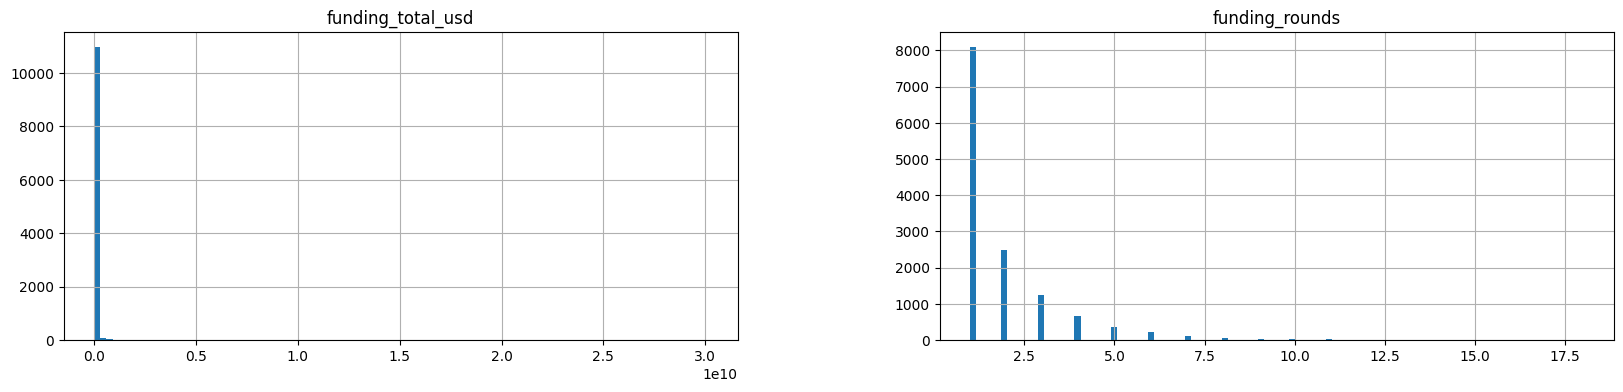

In [28]:
raw_data.hist(
    bins=100,
    figsize=(20, 4)
)

plt.show()

It still not clear what happened with the distribution (we just eliminate the lower bound outliers, where the main problem of unclear visualization is the upper bound outliers). Lets Continue to the categorical data.

### Datetime Data

In [29]:
temp_df = raw_data[['name', 'founded_at', 'first_funding_at', 'last_funding_at', 'status']]

for item in (['founded_at', 'first_funding_at', 'last_funding_at']):
    temp_df[item] = pd.to_datetime(raw_data[item], errors='coerce')

/tmp/ipykernel_32592/1121020916.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df[item] = pd.to_datetime(raw_data[item], errors='coerce')
/tmp/ipykernel_32592/1121020916.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df[item] = pd.to_datetime(raw_data[item], errors='coerce')
/tmp/ipykernel_32592/1121020916.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

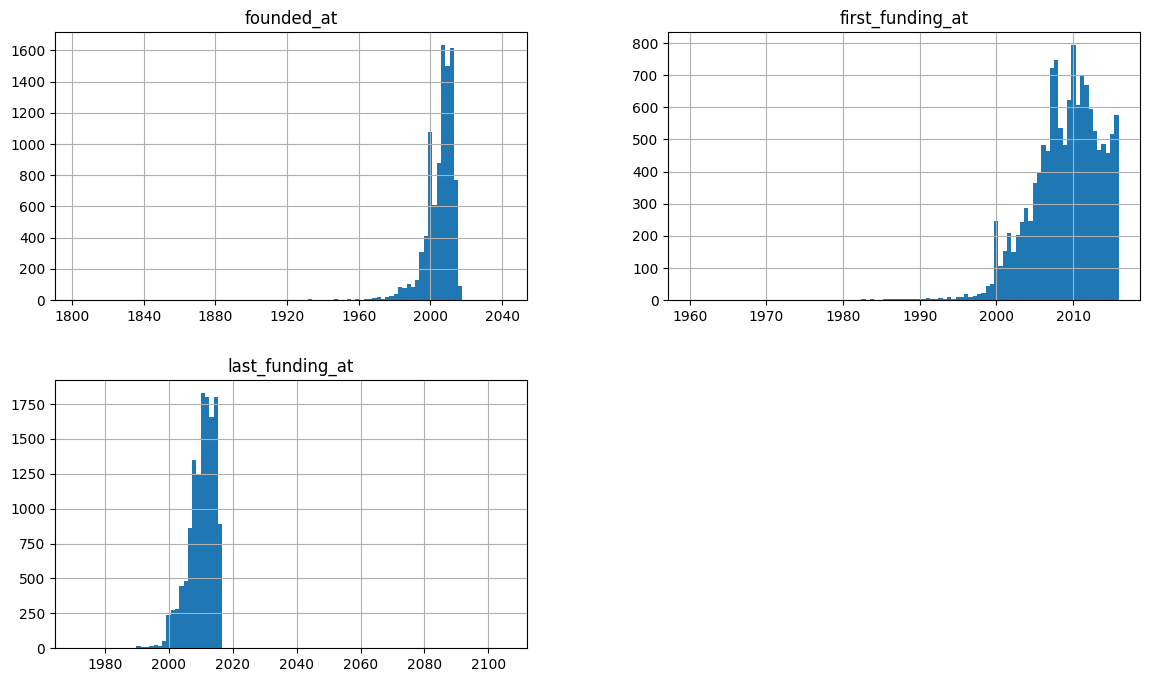

In [30]:
temp_df.hist(
    bins=100,
    figsize=(14, 8)
)

plt.show()

It look a like there is date that is greater than today (2023). Lets change it to None.

In [31]:
for item in (['founded_at', 'first_funding_at', 'last_funding_at']):
    temp_df[item][(temp_df[temp_df[item].dt.year > 2023]).index] = None

/tmp/ipykernel_32592/804943066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df[item][(temp_df[temp_df[item].dt.year > 2023]).index] = None
/tmp/ipykernel_32592/804943066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df[item][(temp_df[temp_df[item].dt.year > 2023]).index] = None
/tmp/ipykernel_32592/804943066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df[item][(temp_df[temp_df[item].dt.year > 2023]).

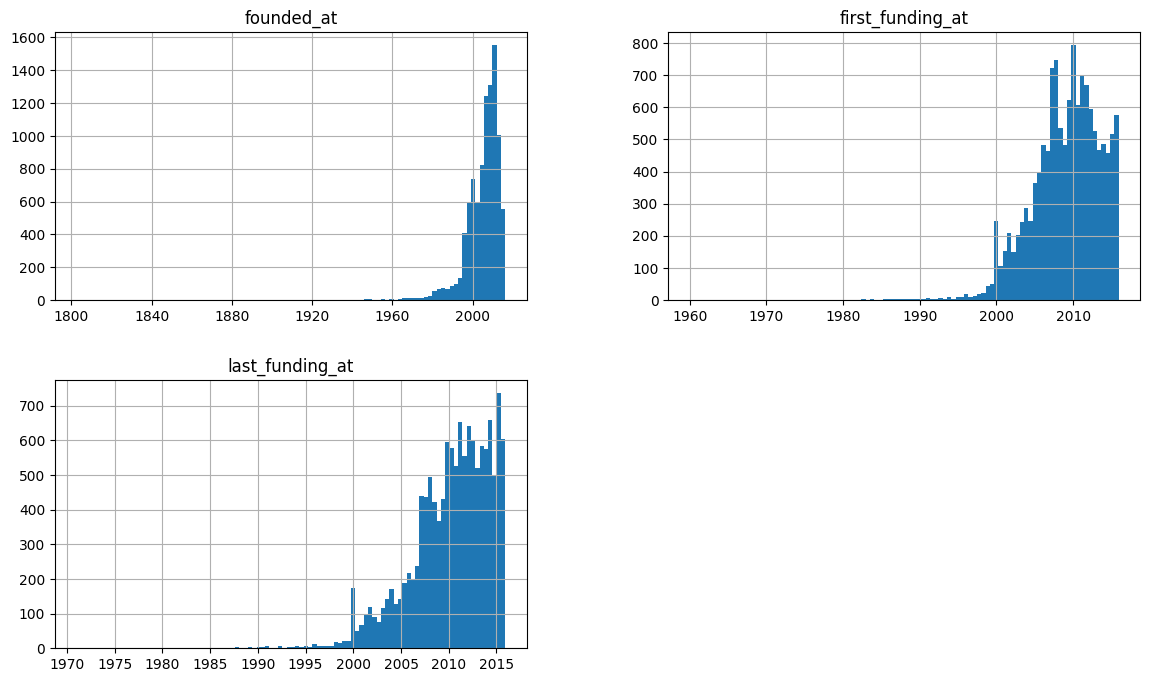

In [32]:
temp_df.hist(
    bins=100,
    figsize=(14, 8)
)

plt.show()

In [33]:
temp_df.describe()

/tmp/ipykernel_32592/1505501050.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  temp_df.describe()
/tmp/ipykernel_32592/1505501050.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  temp_df.describe()
/tmp/ipykernel_32592/1505501050.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  temp_df.describe()


,name,founded_at,first_funding_at,last_funding_at,status
count,13326,9594,13325,13326,13327
unique,13321,1632,3789,3665,2
top,SHIFT,2007-01-01 00:00:00,2008-01-01 00:00:00,2008-01-01 00:00:00,success
freq,2,342,171,130,7096
first,NaN,1802-07-19 00:00:00,1960-01-01 00:00:00,1971-01-01 00:00:00,NaN
last,NaN,2016-04-02 00:00:00,2015-12-04 00:00:00,2015-12-04 00:00:00,NaN


Lets check the validity of the datetime. Logically it should be founded_at < first_funding_at < last_funding_at.

In [34]:
invalid_first_funding_date = temp_df['founded_at'] > temp_df['first_funding_at']
invalid_last_funding_date = temp_df['founded_at'] > temp_df['last_funding_at']

invalid_date = np.logical_or(invalid_first_funding_date, invalid_last_funding_date)

invalid_date.value_counts()

False    12567
True       760
dtype: int64

It's quite a lot of invalid date! There are several way to handle it:
- Drop these rows.
- Replace all date value with *None*, then impute it in data preprocessing.
- Replace whether founded date or funding date witn *None*, then impute it in data preprocessing.

Lets try option #3, we will replace the funding date.

In [35]:
invalid_date_index = raw_data['first_funding_at'][invalid_date].index

In [36]:
raw_data['founded_at'][invalid_date_index] = None

temp_df['founded_at'][invalid_date_index] = None

/tmp/ipykernel_32592/4059708365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['founded_at'][invalid_date_index] = None
/tmp/ipykernel_32592/4059708365.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['founded_at'][invalid_date_index] = None
/tmp/ipykernel_32592/4059708365.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['founded_at'][invalid_date_index] = None


Lets plot the range of first and last funding, founded date and first funding, then founded date and last funding.

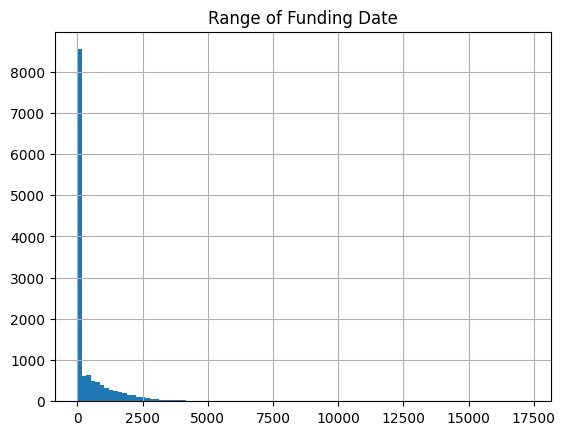

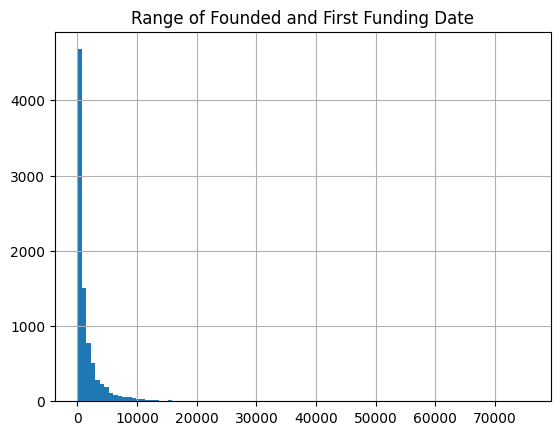

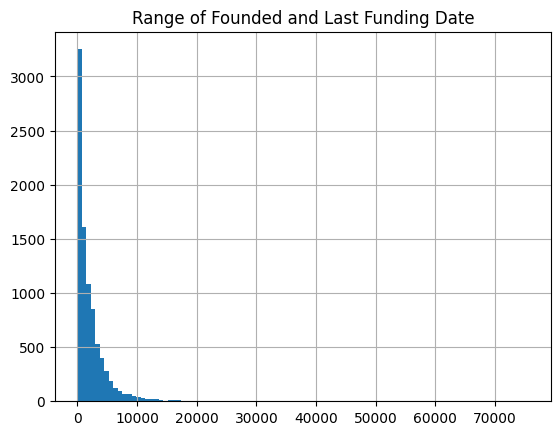

In [37]:
# Last - First Funding
(temp_df['last_funding_at'] - temp_df['first_funding_at']).astype('timedelta64[D]').hist(bins=100)
plt.title('Range of Funding Date')

plt.show()

# First Funding - Founded Date
(temp_df['first_funding_at'] - temp_df['founded_at']).astype('timedelta64[D]').hist(bins=100)
plt.title('Range of Founded and First Funding Date')

plt.show()

# Last Funding - Founded Date
(temp_df['last_funding_at'] - temp_df['founded_at']).astype('timedelta64[D]').hist(bins=100)
plt.title('Range of Founded and Last Funding Date')

plt.show()

### Categorical Data

In [38]:
cat_data = raw_data.select_dtypes(include=object)

cat_data.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,first_funding_at,last_funding_at
15,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,success,USA,CA,SF Bay Area,Cupertino,2012-03-01,2015-03-17,2015-03-17
20,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,success,USA,WA,Seattle,Seattle,2009-01-01,2009-05-15,2009-05-15
23,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,success,USA,CA,SF Bay Area,San Francisco,None,2010-01-01,2011-02-16
31,/organization/100plus,100Plus,http://www.100plus.com,Analytics,success,USA,CA,SF Bay Area,San Francisco,2011-09-16,2011-11-02,2011-11-30
32,/organization/1010data,1010data,http://www.1010data.com,Software,success,USA,NY,New York City,New York,2000-01-01,2010-03-08,2010-03-08


### Check Uniqueness of the Data

In [39]:
cat_data.nunique()

permalink           13327
name                13321
homepage_url        12095
category_list        5744
status                  2
country_code           84
state_code            209
region                595
city                 1711
founded_at           1405
first_funding_at     3789
last_funding_at      3666
dtype: int64

That's a lot of unique values! Lets just drop the permalink, name, and hompeage_url because these columns almost unique, so there is no point to plot the distribution.
<br>

Next, lets inspect the category_list because it look like it has too many unique value. 

### category_list

In [40]:
cat_data

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,first_funding_at,last_funding_at
15,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,success,USA,CA,SF Bay Area,Cupertino,2012-03-01,2015-03-17,2015-03-17
20,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,success,USA,WA,Seattle,Seattle,2009-01-01,2009-05-15,2009-05-15
23,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,success,USA,CA,SF Bay Area,San Francisco,None,2010-01-01,2011-02-16
31,/organization/100plus,100Plus,http://www.100plus.com,Analytics,success,USA,CA,SF Bay Area,San Francisco,2011-09-16,2011-11-02,2011-11-30
32,/organization/1010data,1010data,http://www.1010data.com,Software,success,USA,NY,New York City,New York,2000-01-01,2010-03-08,2010-03-08
...,...,...,...,...,...,...,...,...,...,...,...,...
66349,/organization/zyncro,Zyncro,http://www.zyncro.com,Cloud Computing|Enterprise 2.0|Enterprise Soft...,success,ESP,56,Barcelona,Barcelona,2009-09-01,2011-04-05,2012-02-03
66350,/organization/zynerba-pharmaceuticals,Zynerba Pharmaceuticals,http://zynerba.com,Pharmaceuticals,success,USA,PA,Philadelphia,Radnor,2014-01-01,2014-10-14,2014-10-14
66352,/organization/zynga,Zynga,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,success,USA,CA,SF Bay Area,San Francisco,None,2007-01-01,2011-02-18
66358,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,fail,MYS,14,MYS - Other,Damansara New Village,1994-01-01,2008-01-01,2013-02-15


In [41]:
count_categories = cat_data['category_list'].value_counts()

count_categories

Software                                                            917
Biotechnology                                                       807
Curated Web                                                         373
Mobile                                                              272
Enterprise Software                                                 247
                                                                   ... 
Networking|Technology|Web Hosting                                     1
E-Commerce|Facebook Applications                                      1
Collaborative Consumption|E-Commerce|Marketplaces|Tourism|Travel      1
Apps|Internet                                                         1
Facebook Applications|Games|Networking|Technology                     1
Name: category_list, Length: 5744, dtype: int64

As we can see, startup that has multiple categories treated as unique, for now lets drop these startup, we will come back later in data preprocessing to include it in machine learning pipeline.
<br>
We can see a pattern here, it consider multiple categories when '|' appears, so lets find these values

In [42]:
mul_categories = count_categories.index.str.replace('|', ',').str.contains(',')

mul_categories

/tmp/ipykernel_32592/235368749.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mul_categories = count_categories.index.str.replace('|', ',').str.contains(',')


array([False, False, False, ...,  True,  True,  True])

In [43]:
single_categories = count_categories[~mul_categories]

single_categories

Software               917
Biotechnology          807
Curated Web            373
Mobile                 272
Enterprise Software    247
                      ... 
Trading                  1
Clinical Trials          1
Smart Grid               1
Bitcoin                  1
Developer APIs           1
Name: category_list, Length: 214, dtype: int64

In [85]:
single_categories[single_categories < 10]

Nonprofits         9
Retail             9
Banking            8
Networking         8
Publishing         8
                  ..
Trading            1
Clinical Trials    1
Smart Grid         1
Bitcoin            1
Developer APIs     1
Name: category_list, Length: 166, dtype: int64

We got the single_categories list! We will use it in data preprocessing to cluster the categories_list by using One Hot Encoder.

## EDA Conclusion

Lets wrap it up:
1. SInce our objective is predict if startup success or not (ipo, acquired, closed), we drop the 'operating' rows.
2. The target variables not uniformly distributed, so we will evaluate our model using ROC-AUC or F1 score later.
3. There are suspectible duplicate startup data, however permalink treat it as unique, so lets assume these startups with the same name is unique.
4. The funding_total_usd contains outliers (the lower bound one), since it doesn't make any sense for someone to fund a startup by just 2 usd, so we use threshold 1000 usd for funding_total_usd.
5. In the datetime, there are some non-sense input (e. g. datetime that greater than today, first funding smaller than founded date, logically it should be founded date < first funding < last funding).
5. Some startups have multiple categories in category_list, we will transform it in data preprocessing later before do machine learning modeling.

## Data Preprocessing

Since the permalink and is name almost unique, we can drop these features.

In [44]:
data = raw_data.drop(['permalink', 'name'], axis=1).reset_index(drop=True)

data

,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,http://www.1mainstream.com,Apps|Cable|Distribution|Software,5000000.0,success,USA,CA,SF Bay Area,Cupertino,1,2012-03-01,2015-03-17,2015-03-17
1,http://www.1000markets.com,Art|E-Commerce|Marketplaces,500000.0,success,USA,WA,Seattle,Seattle,1,2009-01-01,2009-05-15,2009-05-15
2,http://1000memories.com,Curated Web,2535000.0,success,USA,CA,SF Bay Area,San Francisco,2,None,2010-01-01,2011-02-16
3,http://www.100plus.com,Analytics,1250000.0,success,USA,CA,SF Bay Area,San Francisco,2,2011-09-16,2011-11-02,2011-11-30
4,http://www.1010data.com,Software,35000000.0,success,USA,NY,New York City,New York,1,2000-01-01,2010-03-08,2010-03-08
...,...,...,...,...,...,...,...,...,...,...,...,...
13322,http://www.zyncro.com,Cloud Computing|Enterprise 2.0|Enterprise Soft...,3805520.0,success,ESP,56,Barcelona,Barcelona,2,2009-09-01,2011-04-05,2012-02-03
13323,http://zynerba.com,Pharmaceuticals,13000000.0,success,USA,PA,Philadelphia,Radnor,1,2014-01-01,2014-10-14,2014-10-14
13324,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,866550786.0,success,USA,CA,SF Bay Area,San Francisco,9,None,2007-01-01,2011-02-18
13325,http://www.zyraz.com,Biotechnology,15419877.0,fail,MYS,14,MYS - Other,Damansara New Village,4,1994-01-01,2008-01-01,2013-02-15


### Data Split

In [45]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(
    data.drop('status', axis=1),
    data[['status']],
    test_size=0.2,
    random_state=69
)

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=69
)

In [46]:
X_train.head()

,homepage_url,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
2831,http://www.crashpadder.com,Curated Web|Peer-to-Peer|Travel,NaN,GBR,H9,London,London,1,2009-01-01,2011-04-14,2011-04-14
12873,http://www.wintegra.com,Web Hosting,50461490.0,USA,TX,Austin,Austin,7,2000-01-01,2000-01-01,2008-11-01
7511,http://www.mustijamirri.fi/,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2014-12-01,2014-12-01
6665,http://www.loraxag.com,Clean Technology,4500000.0,USA,MA,Boston,Marlborough,1,NaN,2009-11-30,2009-11-30
11414,http://www.techfaithwireless.com,Business Services|Hardware|Hardware + Software...,38139999.0,CHN,22,Beijing,Beijing,3,2002-01-01,2004-04-01,2009-05-19


### Valid Input for homepage_url

In [47]:
# protocol url
protocol_raw = X_train['homepage_url'].str.split(':').str[0]
valid_protocol = protocol_raw.value_counts().index

# domain url
dom_raw = X_train['homepage_url'].str.split('.', n=2).str[-1].str.split('/').str[0]
valid_dom = dom_raw.value_counts()[dom_raw.value_counts() > 4].index

### homepage_url Pipeline

In [48]:
from sklearn.base import BaseEstimator, TransformerMixin

class UrlTrans(BaseEstimator, TransformerMixin):
    def __init__(self, protocol, domain):
        self.protocol = protocol
        self.domain = domain
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        protocol_raw = X['homepage_url'].str.split(':').str[0]
        protocol_invalid_index = (~protocol_raw.str.fullmatch('|'.join(self.protocol)).astype(bool))
        protocol_raw[protocol_invalid_index] = None
        
        dom_raw = X['homepage_url'].str.split('.', n=2).str[-1].str.split('/').str[0]
        dom_invalid_index = (~dom_raw.str.fullmatch('|'.join(self.domain)).astype(bool))
        dom_raw[dom_invalid_index] = None
        
        X['protocol_url'] = protocol_raw
        X['domain_url'] = dom_raw
        
        return X.drop('homepage_url', axis=1)

### category_list Pipeline

In [49]:
class CatTrans(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X['category_list'] = X['category_list'].fillna('Others').str.split('|')
        
        return X

### Date Pipeline

In [50]:
'''
class RangeDate(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        for item in (['founded_at', 'first_funding_at', 'last_funding_at']):
            temp_date = pd.to_datetime(X[item], errors='coerce')
            
            X[item] = temp_date
            
        X['range_fund'] = (temp_df['last_funding_at'] - temp_df['first_funding_at']).astype('timedelta64[D]')
        X['range_first_fund'] = (temp_df['first_funding_at'] - temp_df['founded_at']).astype('timedelta64[D]')
        
        return X
'''
class DateSeparator(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        for item in (['founded_at', 'first_funding_at', 'last_funding_at']):
            temp_date = pd.to_datetime(X[item], errors='coerce')
            
            X[f'day_{item}'] = temp_date.dt.day
            X[f'month_{item}'] = temp_date.dt.month
            X[f'year_{item}'] = temp_date.dt.year
            
        return X

### Categorical Pipeline

In [51]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer

cat_trans = make_pipeline(
    UrlTrans(valid_protocol, valid_dom),
    CatTrans(),
    DateSeparator()
)

cat_trans

Pipeline(steps=[('urltrans',
                 UrlTrans(domain=Index(['com', 'net', 'ru', 'co', 'de', 'io', 'org', 'me', 'com.br', 'co.uk',
       'tv', 'it', 'in', 'us', 'ca', 'fr', 'jp', 'cn', 'com.au', 'es', 'fm',
       'uk', 'se', 'ly', 'nl', 'cc', 'com.cn', 'eu', 'ai', 'no', 'ch', 'info',
       'pl', 'au', 'br', 'html', 'dk', 'ag'],
      dtype='object'),
                          protocol=Index(['http', 'https'], dtype='object'))),
                ('cattrans', CatTrans()), ('dateseparator', DateSeparator())])

In [52]:
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = MultiLabelBinarizer(*args, **kwargs)
        
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    
    def transform(self, x, y=0):
        return self.encoder.transform(x)

class DfToSeries(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.iloc[:, 0]
    
multi_label = make_pipeline(
    DfToSeries(),
    MyLabelBinarizer()
)

multi_label

Pipeline(steps=[('dftoseries', DfToSeries()),
                ('mylabelbinarizer',
                 <__main__.MyLabelBinarizer object at 0x7fe6dc085050>)])

In [53]:
date_column = []

for item in (['founded_at', 'first_funding_at', 'last_funding_at']):
    for i in (['day', 'month', 'year']):
        date_column.append(f'{i}_{item}')
        
date_column

['day_founded_at',
 'month_founded_at',
 'year_founded_at',
 'day_first_funding_at',
 'month_first_funding_at',
 'year_first_funding_at',
 'day_last_funding_at',
 'month_last_funding_at',
 'year_last_funding_at']

In [54]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

date_range_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

date_pipeline = ColumnTransformer([
    ('Date Category', SimpleImputer(strategy='most_frequent'), date_column[2:]),
    ('Date Numeric', date_range_pipeline, date_column[:2])
])

date_pipeline

ColumnTransformer(transformers=[('Date Category',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['year_founded_at', 'day_first_funding_at',
                                  'month_first_funding_at',
                                  'year_first_funding_at',
                                  'day_last_funding_at',
                                  'month_last_funding_at',
                                  'year_last_funding_at']),
                                ('Date Numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['day_founded_at', 'month_founded_at'])])

In [55]:
encoder_trans = ColumnTransformer([
    ('Multi Label Binarizer', multi_label, ['category_list']),
    ('One Hot Encoder', OneHotEncoder(handle_unknown='ignore'), ['country_code', 'state_code', 'city', 'protocol_url', 'domain_url']),
    ('Date Pipeline', date_pipeline, date_column)
])

encoder_trans

ColumnTransformer(transformers=[('Multi Label Binarizer',
                                 Pipeline(steps=[('dftoseries', DfToSeries()),
                                                 ('mylabelbinarizer',
                                                  <__main__.MyLabelBinarizer object at 0x7fe6dc085050>)]),
                                 ['category_list']),
                                ('One Hot Encoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['country_code', 'state_code', 'city',
                                  'protocol_url', 'domain_url']),
                                ('Date Pipeline',
                                 ColumnTransformer(tra...
                                                                  'Numeric',
                                                                  Pipeline(steps=[('simpleimputer',
                                                                                   SimpleImputer(strategy='median')),
                                                                                  ('standardscaler',
                                                                                   StandardScaler())]),
                                                                  ['day_founded_at',
                                                                   'month_founded_at'])]),
                                 ['day_founded_at', 'month_founded_at',
                                  'year_founded_at', 'day_first_funding_at',
                                  'month_first_funding_at',
                                  'year_first_funding_at',
                                  'day_last_funding_at',
                                  'month_last_funding_at',
                                  'year_last_funding_at'])])

In [56]:
cat_pipeline = make_pipeline(
    cat_trans,
    encoder_trans
)

cat_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('urltrans',
                                  UrlTrans(domain=Index(['com', 'net', 'ru', 'co', 'de', 'io', 'org', 'me', 'com.br', 'co.uk',
       'tv', 'it', 'in', 'us', 'ca', 'fr', 'jp', 'cn', 'com.au', 'es', 'fm',
       'uk', 'se', 'ly', 'nl', 'cc', 'com.cn', 'eu', 'ai', 'no', 'ch', 'info',
       'pl', 'au', 'br', 'html', 'dk', 'ag'],
      dtype='object'),
                                           protocol=Index(['http', 'https'], dtype='obj...
                                                                                   'Numeric',
                                                                                   Pipeline(steps=[('simpleimputer',
                                                                                                    SimpleImputer(strategy='median')),
                                                                                                   ('standardscaler',
                                                                                                    StandardScaler())]),
                                                                                   ['day_founded_at',
                                                                                    'month_founded_at'])]),
                                                  ['day_founded_at',
                                                   'month_founded_at',
                                                   'year_founded_at',
                                                   'day_first_funding_at',
                                                   'month_first_funding_at',
                                                   'year_first_funding_at',
                                                   'day_last_funding_at',
                                                   'month_last_funding_at',
                                                   'year_last_funding_at'])]))])

### Numerical Pipeline

In [57]:
num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

### Full Pipeline

In [58]:
cat_columns = X_train.select_dtypes(include=object).columns
num_columns = X_train.select_dtypes(exclude=object).columns

In [59]:
from sklearn.decomposition import PCA

full_trans = ColumnTransformer([
    ('Categorical Pipeline', cat_pipeline, cat_columns),
    ('Numerical Pipeline', num_pipeline, num_columns)    
])

full_pipeline = make_pipeline(
    full_trans,
    PCA(n_components=128)
)

full_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Categorical Pipeline',
                                                  Pipeline(steps=[('pipeline',
                                                                   Pipeline(steps=[('urltrans',
                                                                                    UrlTrans(domain=Index(['com', 'net', 'ru', 'co', 'de', 'io', 'org', 'me', 'com.br', 'co.uk',
       'tv', 'it', 'in', 'us', 'ca', 'fr', 'jp', 'cn', 'com.au', 'es', 'fm',
       'uk', 'se', 'ly', 'nl', 'cc', 'com.cn', 'eu', 'ai', 'no', 'ch', 'info'...
                                                  Index(['homepage_url', 'category_list', 'country_code', 'state_code', 'region',
       'city', 'founded_at', 'first_funding_at', 'last_funding_at'],
      dtype='object')),
                                                 ('Numerical Pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['funding_total_usd', 'funding_rounds'], dtype='object'))])),
                ('pca', PCA(n_components=128))])

### Target Pipeline

In [60]:
from sklearn.preprocessing import OrdinalEncoder

target_pipeline = OrdinalEncoder()

target_pipeline

OrdinalEncoder()

### Data Transformation

In [61]:
full_pipeline.fit(X_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Categorical Pipeline',
                                                  Pipeline(steps=[('pipeline',
                                                                   Pipeline(steps=[('urltrans',
                                                                                    UrlTrans(domain=Index(['com', 'net', 'ru', 'co', 'de', 'io', 'org', 'me', 'com.br', 'co.uk',
       'tv', 'it', 'in', 'us', 'ca', 'fr', 'jp', 'cn', 'com.au', 'es', 'fm',
       'uk', 'se', 'ly', 'nl', 'cc', 'com.cn', 'eu', 'ai', 'no', 'ch', 'info'...
                                                  Index(['homepage_url', 'category_list', 'country_code', 'state_code', 'region',
       'city', 'founded_at', 'first_funding_at', 'last_funding_at'],
      dtype='object')),
                                                 ('Numerical Pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['funding_total_usd', 'funding_rounds'], dtype='object'))])),
                ('pca', PCA(n_components=128))])

In [62]:
target_pipeline.fit(y_train)

OrdinalEncoder()

In [63]:
target_pipeline.categories_

[array(['fail', 'success'], dtype=object)]

In [64]:
X_train_trans, X_val_trans, X_test_trans = full_pipeline.transform(X_train), full_pipeline.transform(X_val), full_pipeline.transform(X_test)

y_train_trans, y_val_trans, y_test_trans = target_pipeline.transform(y_train), target_pipeline.transform(y_val), target_pipeline.transform(y_test)

/home/alfian/.local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['Active Lifestyle', 'Application Performance Monitoring', 'Brewing', 'Certification Test', 'Craft Beer', 'Digital Entertainment', 'EDA Tools', 'Edutainment', 'Emerging Markets', 'Eyewear', 'Face Recognition', 'Financial Exchanges', 'HDTV', 'Indians', 'K-12 Education', 'Mobile Emergency&Health', 'Multi-level Marketing', 'Offline Businesses', 'Performance Marketing', 'Private Corrections', 'Recreation', 'Social Activists', 'Social Entrepreneurship', 'Specialty Chemicals', 'TV Production', 'UV LEDs', 'Watch'] will be ignored
  warnings.warn(
/home/alfian/.local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['Angels', 'Application Performance Monitoring', 'Baby Boomers', 'Brewing', 'Casual Games', 'Cloud-Based Music', 'Craft Beer', 'Direct Advertising', 'Emerging Markets', 'Enterprise Hardware', 'Field Support Services', 'G

In [65]:
y_train_trans, y_val_trans, y_test_trans = y_train_trans.ravel(), y_val_trans.ravel(), y_test_trans.ravel()

In [66]:
X_train_trans.shape

(7995, 128)

## Modeling

### Logistic Regression

In [67]:
%%time

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)

lr_model.fit(X_train_trans, y_train_trans)

CPU times: user 666 ms, sys: 281 ms, total: 947 ms
Wall time: 252 ms


/home/alfian/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [68]:
from sklearn.metrics import roc_auc_score, confusion_matrix

lr_predict = lr_model.predict(X_val_trans)

lr_roc = roc_auc_score(
    y_val_trans,
    lr_predict
)

lr_matrix = confusion_matrix(
    y_val_trans,
    lr_predict
)

print(f'''
Logistic Regression Evaluation

Accuracy Score:
{lr_model.score(X_val_trans, y_val_trans)}

ROC-AUC Score:
{lr_roc}

Confusion Matrix:
{lr_matrix}
''')


Logistic Regression Evaluation

Accuracy Score:
0.7336834208552138

ROC-AUC Score:
0.7307485689521298

Confusion Matrix:
[[ 852  412]
 [ 298 1104]]



### Random Forest

In [69]:
%%time
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train_trans, y_train_trans)

CPU times: user 8.36 s, sys: 99.3 ms, total: 8.46 s
Wall time: 8.42 s


RandomForestClassifier(random_state=42)

In [70]:
rf_predict = rf_model.predict(X_val_trans)

rf_roc = roc_auc_score(
    y_val_trans,
    rf_predict
)

rf_matrix = confusion_matrix(
    y_val_trans,
    rf_predict
)

print(f'''
Random Forest Evaluation

Accuracy Score:
{rf_model.score(X_val_trans, y_val_trans)}

ROC-AUC Score:
{rf_roc}

Confusion Matrix:
{rf_matrix}
''')


Random Forest Evaluation

Accuracy Score:
0.7239309827456865

ROC-AUC Score:
0.7203080138680727

Confusion Matrix:
[[ 822  442]
 [ 294 1108]]



### Gradient Boosting

In [71]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(X_train_trans, y_train_trans)

CPU times: user 32.7 s, sys: 26.6 ms, total: 32.7 s
Wall time: 33 s


GradientBoostingClassifier(random_state=42)

In [72]:
gb_predict = gb_model.predict(X_val_trans)

gb_roc = roc_auc_score(
    y_val_trans,
    gb_predict
)

gb_matrix = confusion_matrix(
    y_val_trans,
    gb_predict
)

print(f'''
Gradient Boosting Evaluation

Accuracy Score:
{gb_model.score(X_val_trans, y_val_trans)}

ROC-AUC Score:
{gb_roc}

Confusion Matrix:
{gb_matrix}
''')


Gradient Boosting Evaluation

Accuracy Score:
0.7378094523630908

ROC-AUC Score:
0.735333452211127

Confusion Matrix:
[[ 869  395]
 [ 304 1098]]



### Ensemble

In [73]:
%%time
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    [('logistic regression', lr_model), ('random forest', rf_model), ('gradient boosting', gb_model)],
    voting='soft',
    n_jobs=-1,
    verbose=100
)

ensemble.fit(X_train_trans, y_train_trans)

/home/alfian/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CPU times: user 52 ms, sys: 102 ms, total: 154 ms
Wall time: 37.3 s


VotingClassifier(estimators=[('logistic regression',
                              LogisticRegression(random_state=42)),
                             ('random forest',
                              RandomForestClassifier(random_state=42)),
                             ('gradient boosting',
                              GradientBoostingClassifier(random_state=42))],
                 n_jobs=-1, verbose=100, voting='soft')

In [80]:
ensemble_predict = ensemble.predict(X_val_trans)

ensemble_roc = roc_auc_score(
    y_val_trans,
    ensemble_predict
)

ensemble_matrix = confusion_matrix(
    y_val_trans,
    ensemble_predict
)

print(f'''
Soft Voting Evaluation

Accuracy Score:
{ensemble.score(X_val_trans, y_val_trans)}

ROC-AUC Score:
{ensemble_roc}

Confusion Matrix:
{ensemble_matrix}
''')


Soft Voting Evaluation

Accuracy Score:
0.7449362340585146

ROC-AUC Score:
0.7414865066180321

Confusion Matrix:
[[ 853  411]
 [ 269 1133]]

[Voting] ...... (1 of 3) Processing logistic regression, total=   0.2s
[Voting] ............ (2 of 3) Processing random forest, total=  10.0s
[Voting] ........ (3 of 3) Processing gradient boosting, total=  35.8s


### Neural Network

In [75]:
from tensorflow.keras import Sequential, layers

nn_model = Sequential([
    layers.Dense(1024, activation='sigmoid'),
    layers.Dense(3, activation='softmax')
])

2023-04-04 20:49:42.039966: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-04 20:49:42.084280: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-04 20:49:42.085078: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-04 20:49:42.927009: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [76]:
from tensorflow.keras import optimizers

nn_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizers.Adam(learning_rate=0.00005),
    metrics='accuracy'
)

In [77]:
from tensorflow.keras import callbacks

fit_hist = nn_model.fit(
    X_train_trans,
    y_train_trans,
    epochs=200,
    validation_data=[X_val_trans, y_val_trans],
    callbacks=[
        callbacks.EarlyStopping(patience=20, restore_best_weights=True)
    ]
)

Epoch 1/200
250/250 [==============================] - 1s 4ms/step - loss: 0.7663 - accuracy: 0.5814 - val_loss: 0.6188 - val_accuracy: 0.6890
Epoch 2/200
250/250 [==============================] - 1s 3ms/step - loss: 0.5952 - accuracy: 0.6931 - val_loss: 0.5852 - val_accuracy: 0.7074
Epoch 3/200
250/250 [==============================] - 1s 3ms/step - loss: 0.5719 - accuracy: 0.7084 - val_loss: 0.5679 - val_accuracy: 0.7153
Epoch 4/200
250/250 [==============================] - 1s 3ms/step - loss: 0.5597 - accuracy: 0.7188 - val_loss: 0.5587 - val_accuracy: 0.7262
Epoch 5/200
250/250 [==============================] - 1s 3ms/step - loss: 0.5515 - accuracy: 0.7233 - val_loss: 0.5531 - val_accuracy: 0.7224
Epoch 6/200
250/250 [==============================] - 1s 3ms/step - loss: 0.5465 - accuracy: 0.7240 - val_loss: 0.5480 - val_accuracy: 0.7232
Epoch 7/200
250/250 [==============================] - 1s 3ms/step - loss: 0.5422 - accuracy: 0.7277 - val_loss: 0.5446 - val_accuracy: 0.7311

Epoch 58/200
250/250 [==============================] - 1s 4ms/step - loss: 0.5171 - accuracy: 0.7433 - val_loss: 0.5305 - val_accuracy: 0.7329
Epoch 59/200
250/250 [==============================] - 1s 4ms/step - loss: 0.5172 - accuracy: 0.7386 - val_loss: 0.5301 - val_accuracy: 0.7311
Epoch 60/200
250/250 [==============================] - 1s 4ms/step - loss: 0.5165 - accuracy: 0.7406 - val_loss: 0.5299 - val_accuracy: 0.7277
Epoch 61/200
250/250 [==============================] - 1s 4ms/step - loss: 0.5170 - accuracy: 0.7415 - val_loss: 0.5293 - val_accuracy: 0.7296
Epoch 62/200
250/250 [==============================] - 1s 4ms/step - loss: 0.5165 - accuracy: 0.7408 - val_loss: 0.5296 - val_accuracy: 0.7322
Epoch 63/200
250/250 [==============================] - 1s 4ms/step - loss: 0.5161 - accuracy: 0.7407 - val_loss: 0.5293 - val_accuracy: 0.7292
Epoch 64/200
250/250 [==============================] - 1s 4ms/step - loss: 0.5158 - accuracy: 0.7416 - val_loss: 0.5307 - val_accuracy:

<Axes: >

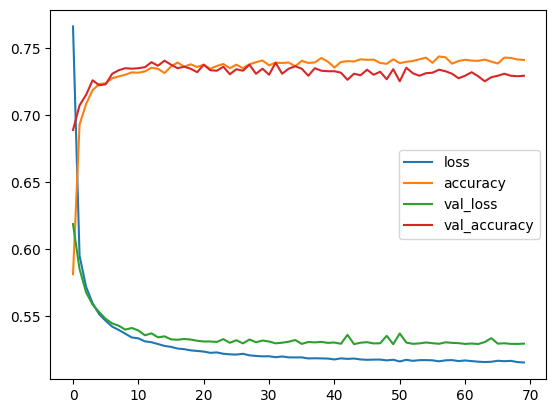

In [78]:
pd.DataFrame(fit_hist.history).plot()

In [79]:
nn_predict = nn_model.predict(X_val_trans).argmax(axis=-1)

nn_roc = roc_auc_score(
    y_val_trans,
    nn_predict
)
nn_matrix = confusion_matrix(
    y_val_trans,
    nn_predict
)

print(f'''
Neural Network Evaluation

Accuracy Score:
{nn_model.evaluate(X_val_trans, y_val_trans)[-1]}

ROC-AUC Score:
{nn_roc}

Confusion Matrix:
{nn_matrix}
''')

84/84 [==============================] - 0s 2ms/step - loss: 0.5292 - accuracy: 0.7344

Neural Network Evaluation

Accuracy Score:
0.7344335913658142

ROC-AUC Score:
0.7322405605012731

Confusion Matrix:
[[ 872  392]
 [ 316 1086]]

